In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Sotiris/Desktop/wireshark_08_05/wireshark.csv')
df.head()

,Address A,Address B,Packets,Bytes,Packets A ? B,Bytes A ? B,Packets B ? A,Bytes B ? A,Rel Start,Duration,Bits/s A ? B,Bits/s B ? A
0,0.0.0.0,255.255.255.255,18108,4102241,18108,4102241,0,0,4.010033,13506.274632,2429.828276,0.0
1,0.0.0.0,239.255.255.250,357,21420,357,21420,0,0,67.293041,13363.648637,12.822845,0.0
2,0.0.0.0,224.0.0.251,259,15725,259,15725,0,0,384.122392,12906.924766,9.746706,0.0
3,1.1.1.1,147.102.203.191,1,350,0,0,1,350,1481.042815,0.000000,0.000000,0.0
4,1.1.1.1,147.102.202.62,1,350,0,0,1,350,11990.552702,0.000000,0.000000,0.0


In [4]:
df['Rel Start'] = df['Rel Start'].astype(int)
df.index = df['Rel Start']
df.drop(columns=['Rel Start'],inplace=True)

df['source computer'] = df['Address A']
df['byte count'] = df['Bytes']

df = df[df['source computer'].str.startswith( '147.102')]

df.head()

,Address A,Address B,Packets,Bytes,Packets A ? B,Bytes A ? B,Packets B ? A,Bytes B ? A,Duration,Bits/s A ? B,Bits/s B ? A,source computer,byte count
Rel Start,,,,,,,,,,,,,
11371,147.102.200.1,224.0.0.252,71,4605,71,4605,0,0,2099.732416,17.545093,0.0,147.102.200.1,4605
11371,147.102.200.1,147.102.203.255,28,2864,28,2864,0,0,55.809387,410.540256,0.0,147.102.200.1,2864
11378,147.102.200.1,224.0.0.251,24,4240,24,4240,0,0,1095.897196,30.951808,0.0,147.102.200.1,4240
11408,147.102.200.1,255.255.255.255,16,3652,16,3652,0,0,1412.927280,20.677639,0.0,147.102.200.1,3652
11413,147.102.200.1,239.255.255.250,211,66354,211,66354,0,0,2081.916441,254.972769,0.0,147.102.200.1,66354


In [5]:
from helper import group_scale_data, group_scale_data_batch

groupped_data, hosts, parameters = group_scale_data(df, size_of_bin_seconds=1000,
                                                    doScale=True, scaler='log')

In [9]:
import numpy as np

print(len(hosts))
print(len(groupped_data))
print(np.sum(groupped_data['number of flows'] == 1))

1162
16268
14876


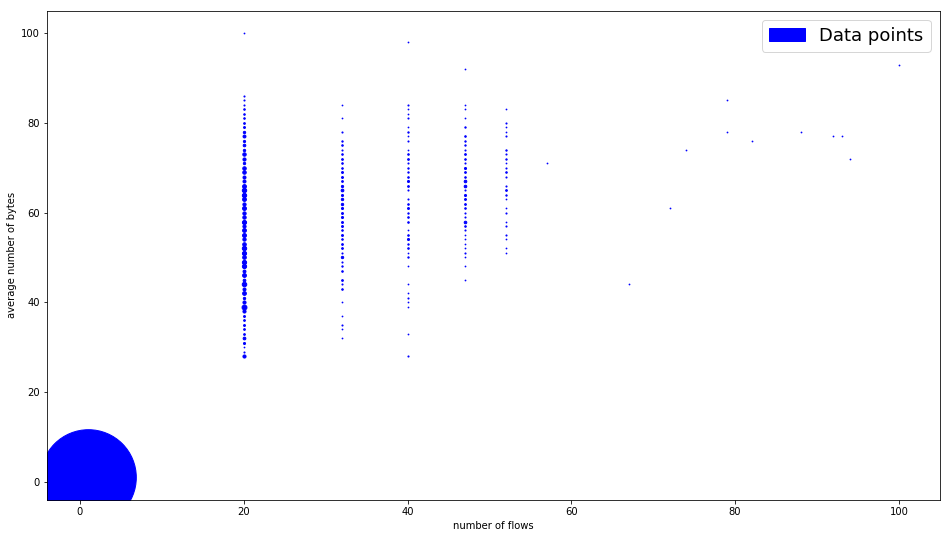

In [8]:
from plots import plot_points
%matplotlib inline

plot_points(groupped_data.values[:,:2])